<a href="https://colab.research.google.com/github/Narcilaq/Monografia/blob/main/05_Primera_Iteracion_%2B_Validacion_con_Datos_Observados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import random
import statistics as st

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

from mlxtend.plotting import plot_confusion_matrix

# **Carga del Dataset**

Carga del Dataset desde github

In [21]:
Data=pd.read_csv('https://raw.githubusercontent.com/Narcilaq/Monografia/main/02_Dataset.csv')
Data.columns =['Señal_0', 'Señal_1', 'Señal_2', 'Señal_3', 'Señal_4', 'Señal_5','Señal_6', 
               'Señal_7', 'Señal_8', 'Señal_9', 'Señal_10', 'Señal_11','Señal','Target']
Data.head()

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal,Target
0,-0.377889,-0.380354,-0.402710,-0.423272,-0.421606,-0.440030,-0.440800,-0.477770,-0.485821,-0.496759,-0.513852,-0.530075,-0.546106,Alerta_4
1,-0.355362,-0.354545,-0.371126,-0.385948,-0.381441,-0.394253,-0.391831,-0.420343,-0.424076,-0.430247,-0.441618,-0.452232,-0.462676,Alerta_3
2,-0.402901,-0.405015,-0.428128,-0.449310,-0.447041,-0.465936,-0.466227,-0.504601,-0.512538,-0.523505,-0.540935,-0.557448,-0.573756,Alerta_4
3,-0.172561,-0.171220,-0.177905,-0.183737,-0.180696,-0.185580,-0.183495,-0.195502,-0.196212,-0.198027,-0.202198,-0.206022,-0.209769,Alerta_2
4,-0.093387,-0.092571,-0.096056,-0.099081,-0.097355,-0.099871,-0.098657,-0.104980,-0.105261,-0.106132,-0.108263,-0.110207,-0.112111,Alerta_2


#**Fraccionamiento de los datos**

In [22]:
y = Data.Target
X = Data.drop(['Target'], axis =1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

# **Modelos Predictivos**

#**Predicción con SVM Kernel Polinómico de grado 2**

“Accuracy Pol2 ovo Kernel:” 0.965
              precision    recall  f1-score   support

    Alerta_1       0.90      1.00      0.95       210
    Alerta_2       0.99      0.87      0.93       206
    Alerta_3       0.99      1.00      0.99       206
    Alerta_4       1.00      1.00      1.00       178

    accuracy                           0.96       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.96      0.96       800



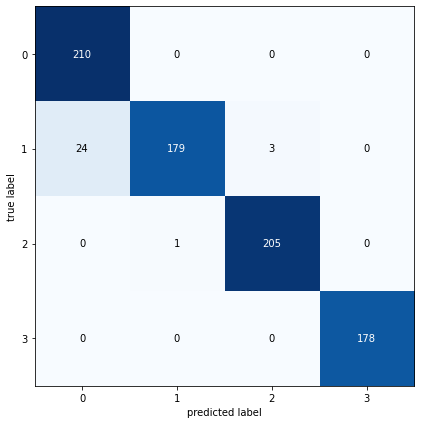

In [24]:
Pol2_ovo = svm.SVC(kernel='poly', degree=2, C=1, decision_function_shape='ovo').fit(X_train, y_train)
Pol2_ovo_pred = Pol2_ovo.predict(X_test)
accuracy_Pol2_ovo = Pol2_ovo.score(X_test, y_test)

print('“Accuracy Pol2 ovo Kernel:”', accuracy_Pol2_ovo)
print(classification_report(y_test, Pol2_ovo_pred))

# creando una matrix de confusion
cm_Pol2_ovo = confusion_matrix(y_test, Pol2_ovo_pred)
plot_confusion_matrix(conf_mat=cm_Pol2_ovo, figsize=(6,6), show_normed=False)
plt.tight_layout()

# **Validación**

Se cargan los datos registrados por el instrumento Exten_E3_P2. Este se muestra como serie de tiempo donde se relaciona la fecha y la señal registrada, posteriormente se muestra una gráfica de su comportamiento.

In [36]:
df_epm=pd.read_excel('https://raw.githubusercontent.com/Narcilaq/Monografia/main/04_Exten_E3_P2.xlsx')
df_epm.index = pd.to_datetime(df_epm.TIMESTAMP)
del(df_epm['TIMESTAMP'])
df_epm.index.name="date"
df_epm

,Señal
date,
2020-12-26 00:00:00,-0.57
2020-12-26 01:00:00,-0.57
2020-12-26 02:00:00,-0.57
2020-12-26 03:00:00,-0.57
2020-12-26 04:00:00,-0.57
...,...
2021-10-21 07:00:00,-14.69
2021-10-21 08:00:00,-14.69
2021-10-21 09:00:00,-14.68


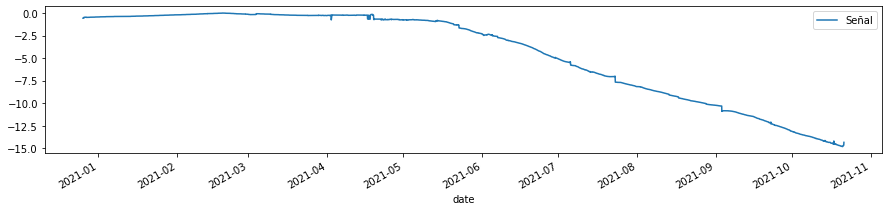

In [35]:
df_epm.plot(figsize=(15,3));

Función para generar un lookback de los datos a 12 horas

In [37]:
def timeseries_as_many2one(d, nb_timesteps_in, columns, timelag=0):
    t = {c: d[c
              ].values for c in columns}
    X = []
    for i in range(len(d)-nb_timesteps_in-timelag):
        x = []
        for c in columns:
            x += list(t[c][i:i+nb_timesteps_in])
        X.append(x)
        
    colnames = []
    for c in columns:
        colnames += ["%s_%d"%(c, i) for i in range(nb_timesteps_in) ]

    X = np.r_[X].reshape(-1, nb_timesteps_in*len(columns))
    X = pd.DataFrame(X, index=d.index[nb_timesteps_in+timelag:], columns=colnames)
    r = X.join(d)
    return r

Ejecutando la función anterior se tendrían procesados los registros para poder desplegar la predicción

In [ ]:
Df_val = timeseries_as_many2one(df_epm, columns=['Señal'],nb_timesteps_in=12, timelag=0)
Df_val.head()

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal
date,,,,,,,,,,,,,
2020-12-26 12:00:00,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47
2020-12-26 13:00:00,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47
2020-12-26 14:00:00,-0.57,-0.57,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47,-0.47
2020-12-26 15:00:00,-0.57,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47,-0.47,-0.46
2020-12-26 16:00:00,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47,-0.47,-0.46,-0.46


Teniendo el los datos procesados se realiza la predicción utilizando los datos observados por el instrumento, adicionalmente se inscorporan los resultados de la predicción al dataFrame de validación.

In [ ]:
Pol2_ovo_pred_val = Pol2_ovo.predict(Df_val)
Resultados = Df_val
Resultados['Prediction'] = Pol2_ovo_pred_val
Resultados.sample(15)

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal,Prediction
date,,,,,,,,,,,,,,
2021-10-09 15:00:00,-13.79,-13.80,-13.80,-13.81,-13.79,-13.79,-13.80,-13.81,-13.81,-13.82,-13.82,-13.82,-13.83,Alerta_4
2021-01-08 10:00:00,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.37,-0.37,-0.37,Alerta_3
2021-06-19 22:00:00,-3.70,-3.70,-3.71,-3.71,-3.71,-3.71,-3.72,-3.72,-3.73,-3.73,-3.74,-3.74,-3.74,Alerta_4
2021-07-13 16:00:00,-6.48,-6.49,-6.49,-6.48,-6.50,-6.51,-6.51,-6.50,-6.49,-6.49,-6.52,-6.53,-6.54,Alerta_4
2021-08-25 21:00:00,-9.88,-9.89,-9.89,-9.89,-9.89,-9.89,-9.90,-9.90,-9.90,-9.90,-9.91,-9.91,-9.91,Alerta_4
2021-09-05 01:52:00,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,Alerta_4
2021-03-19 00:00:00,-0.23,-0.23,-0.23,-0.23,-0.23,-0.24,-0.24,-0.24,-0.24,-0.24,-0.24,-0.24,-0.24,Alerta_3
2021-08-04 07:00:00,-8.33,-8.33,-8.33,-8.34,-8.34,-8.35,-8.35,-8.35,-8.36,-8.36,-8.36,-8.37,-8.37,Alerta_4
2021-09-03 16:18:00,-10.85,-10.85,-10.85,-10.85,-10.85,-10.85,-10.85,-10.85,-10.85,-10.85,-10.85,-10.85,-10.85,Alerta_4


desde un analisis preliminar es fácil notar que registros que no presentan variaciones durante las 12 horas de lectura de datos se clasifican con niveles de alerta 3 y 4, cuando deberían ser niveles de alerta 1, al no evidenciar una conducta de deformación. 

En primera instancia, y sin la necesidad de evaluar métricas se puede considerar que el modelo no funciona correctamente. De igual igual se observará un poco más a detalles las registros etiquetados como Nivel de Alerta 4 para evidenciar mejro este comportamiento.

In [ ]:
Resultados.sort_values("Prediction", inplace = True)
filter = Resultados["Prediction"]=="Alerta_4"
Resultados.where(filter, inplace = True)

Resultados.dropna(0, how='any')

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal,Prediction
date,,,,,,,,,,,,,,
2021-09-05 00:28:00,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,Alerta_4
2021-09-05 00:46:00,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,Alerta_4
2021-09-05 00:47:00,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,Alerta_4
2021-09-05 00:49:00,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,Alerta_4
2021-09-05 00:50:00,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,-10.84,Alerta_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-28 15:00:00,-10.05,-10.05,-10.05,-10.10,-10.11,-10.11,-10.11,-10.11,-10.12,-10.12,-10.12,-10.12,-10.13,Alerta_4
2021-08-28 16:00:00,-10.05,-10.05,-10.10,-10.11,-10.11,-10.11,-10.11,-10.12,-10.12,-10.12,-10.12,-10.13,-10.13,Alerta_4
2021-08-28 17:00:00,-10.05,-10.10,-10.11,-10.11,-10.11,-10.11,-10.12,-10.12,-10.12,-10.12,-10.13,-10.13,-10.13,Alerta_4


Tal como ya se evidenciaba en la instancia anterior el modelo no cumple con el propósito de negocio, pues indica Alertas críticas cuando no ocurre un proceso de deformación.